In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import tomllib
from sklearn.metrics import r2_score
import matplotlib as mpl

import copy

In [2]:
def dew_point_cacl(t, h):
    """t- температура в градусах цельсия, h - влажность воздуха в виде ХХ"""
    a, b = 17.27, 237.7
    g = a * t / (b + t)
    h = np.clip(h, 1e-6, 100.0)
    g += np.log(h / 100)
    dp = (b * g) / (a - g)
    return dp

In [16]:
alldata= pd.read_feather("meteo.feather")
curent_time = alldata["datetime"].max() - pd.Timedelta(days=5)
data_timesort = alldata[alldata["datetime"] > curent_time]
# data = data_timesort[data_timesort["id_s"] == "5"].reset_index()
data = copy.copy(data_timesort).reset_index()
# data["temp_air"] = data["temp_air"] + 8
# data["hum_air"] = data["hum_air"] + 30

работа с toml

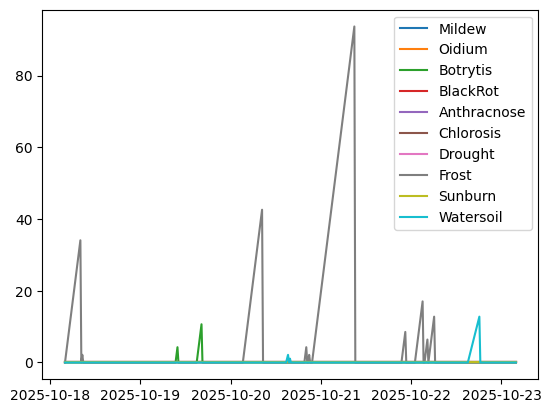

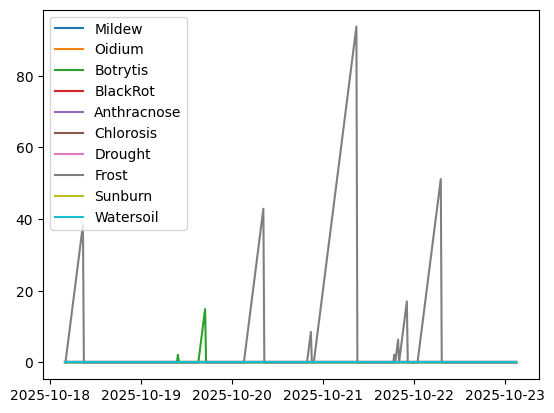

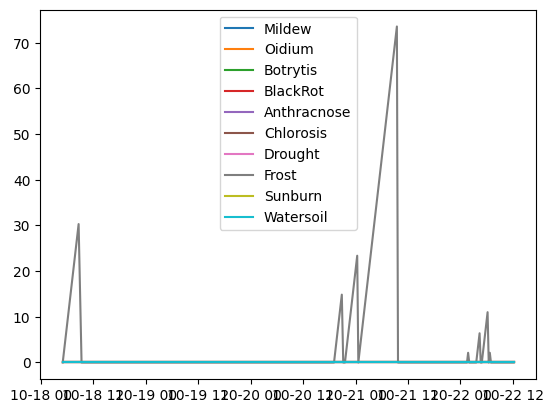

In [24]:
import Diseas
d = Diseas.Diseas_work("deseas_grape.toml", 20)
for id in data['id_s'].unique():
    d.check_time(data[data['id_s']==id],'all')
    plt.figure()
    for d_name in d.names:
       
        plt.plot(d.prob[d_name]['datetime'],d.prob[d_name]['prob'],label=d_name)
        # plt.yscale('log')
    plt.legend()
    plt.show()
    plt.close()

In [18]:
d.names

['Mildew',
 'Oidium',
 'Botrytis',
 'BlackRot',
 'Anthracnose',
 'Chlorosis',
 'Drought',
 'Frost',
 'Sunburn',
 'Watersoil']

In [19]:
d.diseas

{'Mildew':            min    max
 temp_air  19.0   26.0
 hum_air   76.0  104.0,
 'Oidium':            min   max
 temp_air  24.0  31.0
 hum_air   56.0  84.0,
 'Botrytis':            min    max
 temp_air  13.0   27.0
 hum_air   88.0  102.0,
 'BlackRot':            min    max
 temp_air  21.0   28.0
 hum_air   88.0  102.0,
 'Anthracnose':            min    max
 temp_air  24.0   31.0
 hum_air   88.0  102.0,
 'Chlorosis':             min    max
 temp_air   18.4   29.6
 temp_soil  16.6   26.4
 hum_soil   10.0  115.0
 ph          7.2    9.3,
 'Drought':               min      max
 temp_air     22.0     78.0
 hum_air      -8.0     48.0
 uv_index      3.6     13.4
 ilum       4000.0  11000.0
 temp_soil    23.0     72.0
 hum_soil     -3.0     18.0,
 'Frost':             min   max
 temp_air  -48.0   8.0
 temp_soil -49.0  14.0,
 'Sunburn':               min      max
 temp_air     29.0     71.0
 hum_air      -8.0     48.0
 uv_power    680.0   2220.0
 uv_index      8.4     12.6
 ilum       5600.0  22

In [20]:
d.diseas_check

{'Mildew': np.False_,
 'Oidium': np.False_,
 'Botrytis': np.False_,
 'BlackRot': np.False_,
 'Anthracnose': np.False_,
 'Chlorosis': np.False_,
 'Drought': np.False_,
 'Frost': np.True_,
 'Sunburn': np.False_,
 'Watersoil': np.False_}

In [22]:
d.prob

{'Mildew':                datetime  prob
 8   2025-10-18 04:57:38     0
 13  2025-10-18 05:21:22     0
 19  2025-10-18 06:01:38     0
 35  2025-10-18 08:00:54     0
 38  2025-10-18 08:16:18     0
 ..                  ...   ...
 923 2025-10-22 09:49:35     0
 926 2025-10-22 10:04:52     0
 929 2025-10-22 10:20:15     0
 932 2025-10-22 10:35:33     0
 945 2025-10-22 12:09:51     0
 
 [137 rows x 2 columns],
 'Oidium':                datetime  prob
 8   2025-10-18 04:57:38     0
 13  2025-10-18 05:21:22     0
 19  2025-10-18 06:01:38     0
 35  2025-10-18 08:00:54     0
 38  2025-10-18 08:16:18     0
 ..                  ...   ...
 923 2025-10-22 09:49:35     0
 926 2025-10-22 10:04:52     0
 929 2025-10-22 10:20:15     0
 932 2025-10-22 10:35:33     0
 945 2025-10-22 12:09:51     0
 
 [137 rows x 2 columns],
 'Botrytis':                datetime  prob
 8   2025-10-18 04:57:38     0
 13  2025-10-18 05:21:22     0
 19  2025-10-18 06:01:38     0
 35  2025-10-18 08:00:54     0
 38  2025-10-18

In [21]:
d.prob_last

{'Mildew': np.int64(0),
 'Oidium': np.int64(0),
 'Botrytis': np.int64(0),
 'BlackRot': np.int64(0),
 'Anthracnose': np.int64(0),
 'Chlorosis': np.int64(0),
 'Drought': np.int64(0),
 'Frost': np.float64(0.0),
 'Sunburn': np.int64(0),
 'Watersoil': np.int64(0)}

In [23]:
d.time

{'Mildew': 6,
 'Oidium': 0.1,
 'Botrytis': 12,
 'BlackRot': 24,
 'Anthracnose': 12,
 'Chlorosis': 0.1,
 'Drought': 4,
 'Frost': 12,
 'Sunburn': 4,
 'Watersoil': 24}